In [84]:
# %pip install arcgis

In [85]:
import pandas as pd
import numpy as np
import sys, os
from arcgis.features import GeoAccessor
import datetime
from collections import Counter

In [86]:
# opening_date = pd.to_datetime(opening_date).date()
# print(opening_date) 

In [87]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [88]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)

In [89]:
type_dict = {
    'X': 'float32',
    'Y': 'float32',
    'RowID': 'int',
    'City': 'str',
    'CaseNumber':'str',
    'Post': 'str',
    'ZipCode': 'str'
    }

In [90]:
df=pd.read_csv('GunOffenders.csv', dtype=type_dict,)
# df.sample(10)
df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape
1113,1425030.25,593380.4375,1114,19-0310,2019/05/29 00:00:00+00,2021/08/11 00:00:00+00,Jackson,Brandon,NaN,1995/07/28 00:00:00+00,Male,Black,404 Aisquith St,Baltimore,Md,21202,Eastern,324,Oldtown,39.2953,-76.6018,"(39.2953,-76.6018)",NaN


In [91]:
df['DateOfBirth'] = df['DateOfBirth'].str.split(' ', expand=True)

In [92]:
df['CreatedDate'] = df['CreatedDate'].str.split(' ', expand=True)

In [93]:
df['ModifiedDate'] = df['ModifiedDate'].str.split(' ', expand=True)

In [94]:
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'], errors='coerce')
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'], errors='coerce')
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'], errors='coerce')


In [95]:
df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape
666,1430800.25,594134.6875,667,20-0072,2020-02-14,2021-08-25,Sumler,Kinnard,NaN,1995-09-05,Male,Black,517 N Rose St,Baltimore,Md,21205,Southeast,221,Mcelderry Park,39.2973,-76.5814,"(39.2973,-76.5814)",NaN


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   X             2530 non-null   float32       
 1   Y             2530 non-null   float32       
 2   RowID         2748 non-null   int64         
 3   CaseNumber    2748 non-null   object        
 4   CreatedDate   2748 non-null   datetime64[ns]
 5   ModifiedDate  2748 non-null   datetime64[ns]
 6   LastName      2748 non-null   object        
 7   FirstName     2748 non-null   object        
 8   MiddleName    399 non-null    object        
 9   DateOfBirth   2747 non-null   datetime64[ns]
 10  Gender        2748 non-null   object        
 11  Race          2748 non-null   object        
 12  FullAddress   2530 non-null   object        
 13  City          2530 non-null   object        
 14  State         2530 non-null   object        
 15  ZipCode       2527 non-null   object  

In [97]:
from dateutil.relativedelta import relativedelta
from datetime import date

In [98]:
df['age']=df['CreatedDate']-df['DateOfBirth']
df['Age'] = df['age']/np.timedelta64(1,'Y')
df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age
1393,1433177.75,594109.3125,1394,19-0016,2019-01-15,2021-05-04,Paige,Diwaun,NaN,1987-10-19,Male,Black,504 N Robinson St,Baltimore,Md,21205,Southeast,224,Ellwood Park/Monument,39.2972,-76.573,"(39.2972,-76.573)",NaN,11411 days,31.242257


In [99]:
df['Age'].isin([0]).sum()

0

In [100]:
null_vals= 0
for x in df['Age']:
    if x == None:
        # print("True")
        null_vals += 1


null_vals

0

In [101]:
df['Age'].mean()

28.384672316497745

In [102]:
df['Age'].median()

26.240100754977856

In [103]:
df['Race'].value_counts()


Black      2653
White        71
Unknown      19
Asian         4
Indian        1
Name: Race, dtype: int64

In [104]:
df['Gender'].value_counts()

Male      2688
Female      60
Name: Gender, dtype: int64

In [105]:
df['Age'].min(axis = 0)

2.299841885870346

In [106]:
df['Age'].max(axis = 0)

80.28364716592401

In [107]:
df.sort_values('Age', axis=0, ascending=True)

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age
206,1411806.250,595220.1250,207,21-0171,2021-06-04,2021-06-04,Chance,Brion,NaN,2019-02-15,Male,Black,1022 Appleton St,Baltimore,Md,21217,Western,722,Midtown-Edmondson,39.3005,-76.6485,"(39.3005,-76.6485)",NaN,840 days,2.299842
2710,1426328.375,568545.4375,2711,09-0260,2009-08-13,2021-08-23,Dorsey,Raheem,Jabar,1994-06-02,Male,Black,1107 Seaboard Ct,Baltimore,Md,21225,Southern,913,Brooklyn,39.2271,-76.5976,"(39.2271,-76.5976)",NaN,5551 days,15.198122
2624,1409505.750,589857.1250,2625,11-0487,2011-11-21,2020-12-07,Holt,Arteesha,NaN,1996-04-23,Female,Black,2526 W Lombard St,Baltimore,Md,21223,Southwest,835,Shipley Hill,39.2858,-76.6567,"(39.2858,-76.6567)",NaN,5690 days,15.578691
2679,1426750.125,594844.9375,2680,10-0354,2010-08-31,2020-12-07,Hall,Anthony,NaN,1994-07-07,Male,Black,1621 E Madison St,Baltimore,Md,21287,Eastern,323,Gay Street,39.2993,-76.5957,"(39.2993,-76.5957)",NaN,5899 days,16.150913
2361,1426193.000,592839.1875,2362,15-0040,2015-01-22,2021-05-04,Moore,Torray,NaN,1998-11-11,Male,Black,210 N Spring Ct,Baltimore,Md,21231,Southeast,212,Dunbar-Broadway,39.2938,-76.5977,"(39.2938,-76.5977)",NaN,5916 days,16.197458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,1402956.375,592965.7500,2350,15-0119,2015-03-23,2021-08-24,Cobb,Jessie,NaN,1945-05-02,Male,Black,607 Mount Holly St,Baltimore,Md,21229,Southwest,815,Edgewood,39.2944,-76.6798,"(39.2944,-76.6798)",NaN,25527 days,69.890552
643,NaN,NaN,644,20-0096,2020-03-02,2020-12-07,Wynne,Hardaway,NaN,1948-01-29,Male,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",NaN,26331 days,72.091829
1477,NaN,NaN,1478,18-0667,2018-12-06,2020-12-07,Gomez,Irvin,NaN,1944-08-31,Male,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",NaN,27125 days,74.265728
1574,1361726.875,619188.4375,1575,18-0563,2018-10-10,2021-03-30,Chavis,Gordon,NaN,1938-06-29,Male,Black,"9620 Mendoza Road, Randallstown, 21133",Randallstown,Md,21133,NaN,NaN,NaN,39.3667,-76.8253,"(39.3667,-76.8253)",NaN,29323 days,80.283647


In [108]:
import matplotlib

In [109]:
df['year'] = pd.DatetimeIndex(df['CreatedDate']).year

In [110]:
years_by_count=df[['RowID','year']].groupby('year').agg('count')


In [111]:
df['Age']=df['Age'].apply(np.floor)
df.Age.dtype

dtype('float64')

In [112]:
df['Age']=df['Age'].astype(str).apply(lambda x: x.replace('.0',''))

In [113]:
df['Latitude']=df['Latitude'].astype(str).apply(lambda x: x.replace('.0',''))
df['Longitude']=df['Longitude'].astype(str).apply(lambda x: x.replace('.0',''))

In [114]:
df['coordinates'] = list(zip(df.Latitude, df.Longitude))

In [115]:
df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age,year,coordinates
320,1419700.25,575146.0625,321,21-0055,2021-02-17,2021-08-16,Webster,Christopher,NaN,2001-05-08,Male,Black,826 Seagull Ave,Baltimore,Md,21225,Southern,922,Cherry Hill,39.2453,-76.6209,"(39.2453,-76.6209)",NaN,7225 days,19,2021,"(39.2453, -76.6209)"


<AxesSubplot:xlabel='year'>

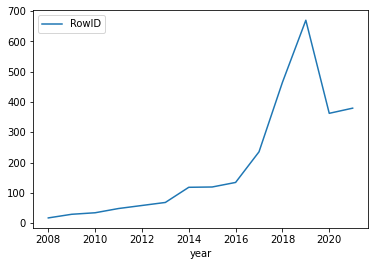

In [116]:
years_by_count.plot()

In [117]:
df.to_csv('data.csv', index=False)

In [118]:
df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age,year,coordinates
555,1404036.875,591549.0625,556,20-0186,2020-06-09,2020-12-07,Davis,Travis,NaN,1996-02-23,Male,Black,218 N Edgewood St,Baltimore,Md,21229,Southwest,824,Allendale,39.2905,-76.676,"(39.2905,-76.676)",NaN,8873 days,24,2020,"(39.2905, -76.676)"


In [119]:
# %pip install geopandas

In [120]:
# %pip install shapely

In [122]:
df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age,year,coordinates
1725,1403512.75,603712.6875,1726,18-0345,2018-06-18,2021-08-23,Gross,John,NaN,1991-02-10,Male,Black,3608 Springdale Ave,Baltimore,Md,21216,Northwest,623,Forest Park,39.3239,-76.6777,"(39.3239,-76.6777)",NaN,9990 days,27,2018,"(39.3239, -76.6777)"


In [134]:
zips_by_count=df[['District', 'RowID','ZipCode',]].groupby(['District', 'ZipCode',]).agg('count')

In [135]:
zips_by_count.to_csv('zips_by_count.csv')

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt  
import json  
# geo_df= pd.read_csv("data.csv", low_memory=False)
# geo_df['geometry'] = geo_df['coordinates'].apply(wkt.loads)

In [ ]:
# from: https://geoffboeing.com/2015/10/exporting-python-data-geojson/

def df_to_geojson(df, properties, lat='Latitude', lon='Longitude'):
    geojson = {'type':'FeatureCollection', 'features':[]}
    for _, row in df.iterrows():
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}
        feature['geometry']['coordinates'] = [row[lon],row[lat]]
        for prop in properties:
            feature['properties'][prop] = row[prop]
        geojson['features'].append(feature)
    return geojson

In [ ]:
df.sample()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,Gender,Race,FullAddress,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape,age,Age,year,coordinates
1858,1411399.5,597950.375,1859,18-0043,2019-03-22,2021-03-30,Taylor,Dewan,NaN,1980-11-22,Male,Black,1724 N Payson St,Baltimore,Md,21217.0,Western,735,Easterwood,39.308,-76.6499,"(39.308,-76.6499)",NaN,13999 days,38,2019,"(39.308, -76.6499)"


In [ ]:
#  from: https://stackoverflow.com/questions/49243736/how-do-i-handle-object-of-type-timestamp-is-not-json-serializable-in-python

def cast_for_gsheets(df):
    # casting as string if not serializable
    for column, dt in zip(df.columns, df.dtypes):
        if dt.type not in [
            np.int64,
            np.float_,
            np.bool_,
        ]:
            df.loc[:, column] = df[column].astype(str)
    return df

df = cast_for_gsheets(df)


In [ ]:
# df.to_json('geoJson_data.json', orient="records")

In [ ]:
# result = df.to_json("geoJson_data.json")
# parsed = json.loads(result)
# json.dumps(parsed, orient="records", indent=4) 
# result

In [ ]:
# cols = ['CaseNumber', 'CreatedDate', 'ModifiedDate', 'LastName', 'FirstName', 'DateOfBirth', 'Gender', 'Race', 'FullAddress', 'City', 'State', 'ZipCode', 'Post', 'Neighborhood', 'Age', 'year']
# geojson = df_to_geojson(df, cols)

In [ ]:
# output_filename = 'geoJson_data.js'
# with open(output_filename, 'w') as output_file:
#     # output_file.write('var data = ')
#     json.dump(geojson, output_filen, indent=2, orient) 

